Prediksi Potensi Penyakit Jantung

1. Persiapan [Preparation]

> 1.1. Import modul dan package yang akan digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

> 1.2. Mempersiapkan dataset yang akan digunakan dengan menginstall kaggle

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"galaxydnjv","key":"154b5e1bc1280efbe6fd18c5db8539cf"}'}

In [3]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [4]:
#mengudnuh dataset dari kaggle
!kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 13.1MB/s]


In [5]:
#ekstrak file zip ke direktori aktif
!unzip /content/heart-disease-dataset.zip

Archive:  /content/heart-disease-dataset.zip
  inflating: heart.csv               


2. Data Understanding
> 2.1. Memuat dataset ke dalam dataframe menggunakan pandas

In [6]:
df = pd.read_csv("/content/heart.csv")

In [7]:
df.shape

(1025, 14)

Didapatkan bahwa terdapat 1025 baris dan 14 kolom

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
#memuat informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
#memuat deskripsi tiap kolom ygg kemudian ditranspose untuk memudahkan pembacaan
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


> 2.2. Cek missing values atau data yg kosong


In [11]:
#melihat apakah ada data yg kosong di tiap kolomnya
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dalam data tidak terdapat data yang kosong atau missing values

> 2.3. Memisahkan categorical dan continuous column


In [12]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_col = ['target']

print('Yang termasuk kolom kategorial adalah : ', cat_cols)
print('Yang termasuk kolom kontinyu adalah : ', cont_cols)
print('Yang termasuk kolom target adalah : ', target_col)


Yang termasuk kolom kategorial adalah :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Yang termasuk kolom kontinyu adalah :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Yang termasuk kolom target adalah :  ['target']


In [13]:
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


3. Exploratory Data Analysis (EDA)
> 3.1. Univariate Analysis

>>> 3.1.1. Visualisasi data berupa count plot untuk fitur kategorikal (categorical features)

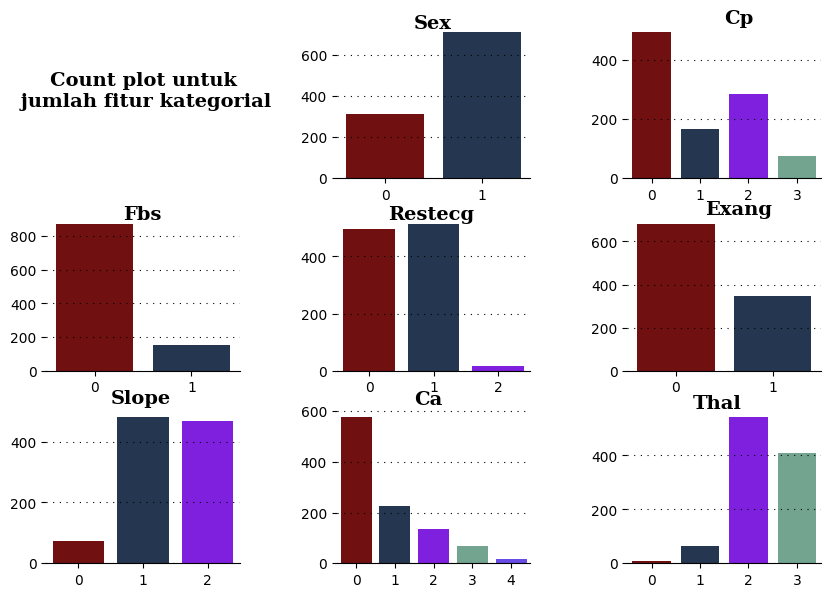

In [14]:
fig = plt.figure(figsize=(10,7))
g = fig.add_gridspec(3,3)
g.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(g[0,0])
ax1 = fig.add_subplot(g[0,1])
ax2 = fig.add_subplot(g[0,2])
ax3 = fig.add_subplot(g[1,0])
ax4 = fig.add_subplot(g[1,1])
ax5 = fig.add_subplot(g[1,2])
ax6 = fig.add_subplot(g[2,0])
ax7 = fig.add_subplot(g[2,1])
ax8 = fig.add_subplot(g[2,2])

color_palette = ['#800000', '#1d3557','#8000ff', '#6aac90', '#5833ff', '#da8829']

ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, "Count plot untuk\n jumlah fitur kategorial\n",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize='14', fontweight='bold',
         fontfamily='serif', color='#000000')

# Sex count
ax1.text(0.3, 730, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Cp count
ax2.text(1.5, 525, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='cp',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Fbs count
ax3.text(0.3, 900, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='fbs',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Restecg count
ax4.text(0.3, 530, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='restecg',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Exang count
ax5.text(0.3, 725, 'Exang', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='exang',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# slope count
ax6.text(0.5, 525, 'Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='slope',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# ca count
ax7.text(1.5, 625, 'Ca', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='ca',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# thal count
ax8.text(0.85, 575, 'Thal', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thal',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

>>> 3.1.2. Visualisasi data berupa boxenplot untuk fitur kontinyu (continuous features)

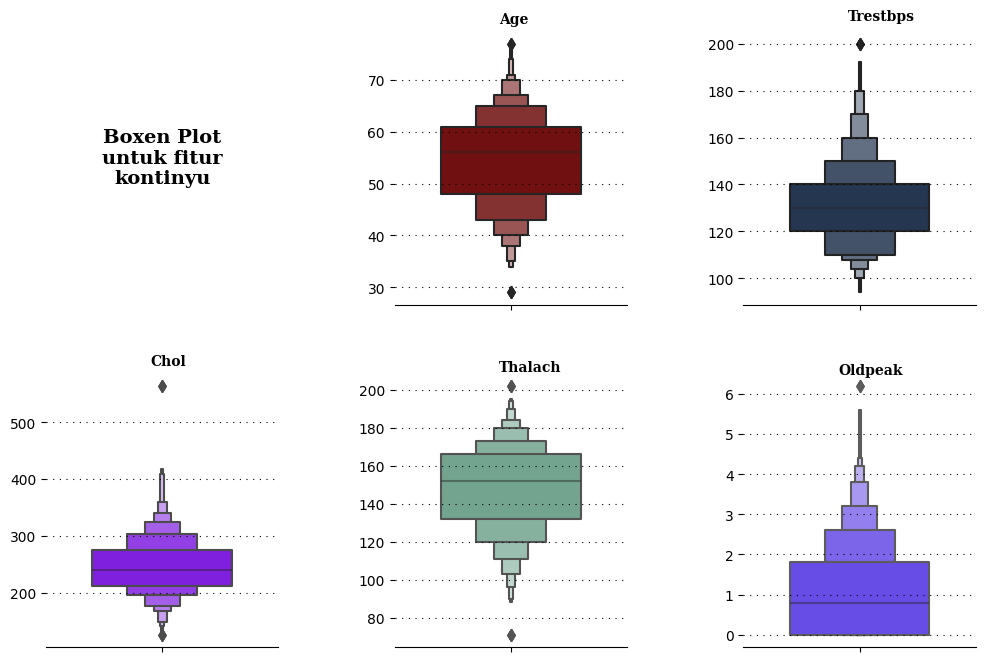

In [15]:
fig = plt.figure(figsize=(12,8))
g = fig.add_gridspec(2,3)
g.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(g[0,0])
ax1 = fig.add_subplot(g[0,1])
ax2 = fig.add_subplot(g[0,2])
ax3 = fig.add_subplot(g[1,0])
ax4 = fig.add_subplot(g[1,1])
ax5 = fig.add_subplot(g[1,2])

color_palette = ['#800000', '#1d3557','#8000ff', '#6aac90', '#5833ff', '#da8829']

#title
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5, 0.5, "Boxen Plot\nuntuk fitur\nkontinyu\n",
        horizontalalignment='center',
        verticalalignment='center',
        fontsize='14', fontweight='bold',
        fontfamily='serif', color='#000000')

# Age count
ax1.text(-0.05, 81, 'Age', fontsize=10, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,data=df,y=df['age'],palette=["#800000"], width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trestbps count
ax2.text(-0.05, 210, 'Trestbps', fontsize=10, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,data=df,y=df['trestbps'],palette=['#1d3557'], width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol count
ax3.text(-0.05, 600, 'Chol', fontsize=10, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,data=df,y=df['chol'],palette=["#8000ff"], width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalach count
ax4.text(-0.05, 210, 'Thalach', fontsize=10, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,data=df,y=df['thalach'],palette=["#6aac90"], width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Oldpeak count
ax5.text(-0.09, 6.5, 'Oldpeak', fontsize=10, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,data=df,y=df['oldpeak'],palette=["#5833ff"], width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

>>> 3.1.3. Visualisasi data berupa countplot untuk kolom target

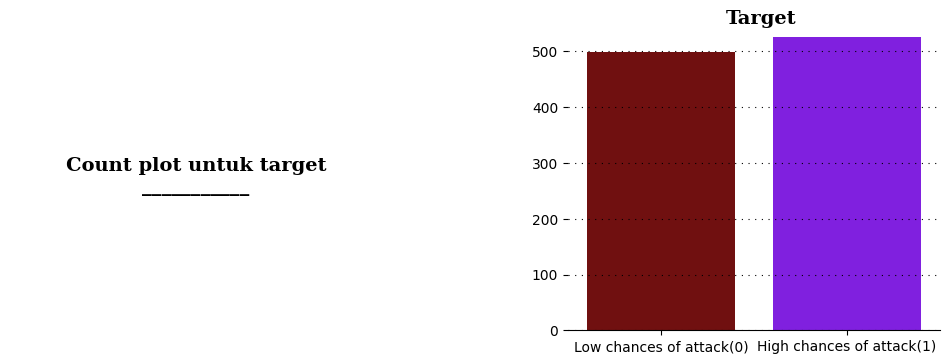

In [16]:
fig = plt.figure(figsize=(12,4))
g = fig.add_gridspec(1,2)
g.update(wspace=0.5, hspace=0.15)
ax0 = fig.add_subplot(g[0,0])
ax1 = fig.add_subplot(g[0,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Title of the plot
ax0.text(0.5,0.5,"Count plot untuk target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,550,"Target",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'target',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)


>3.2. Multivariate Analysis
>>>3.2.1. Correlation matrix dan heatmap

In [17]:
df_corr = df[cont_cols].corr().T
df_corr

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434
chol,0.219823,0.127977,1.000000,-0.021772,0.064880
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

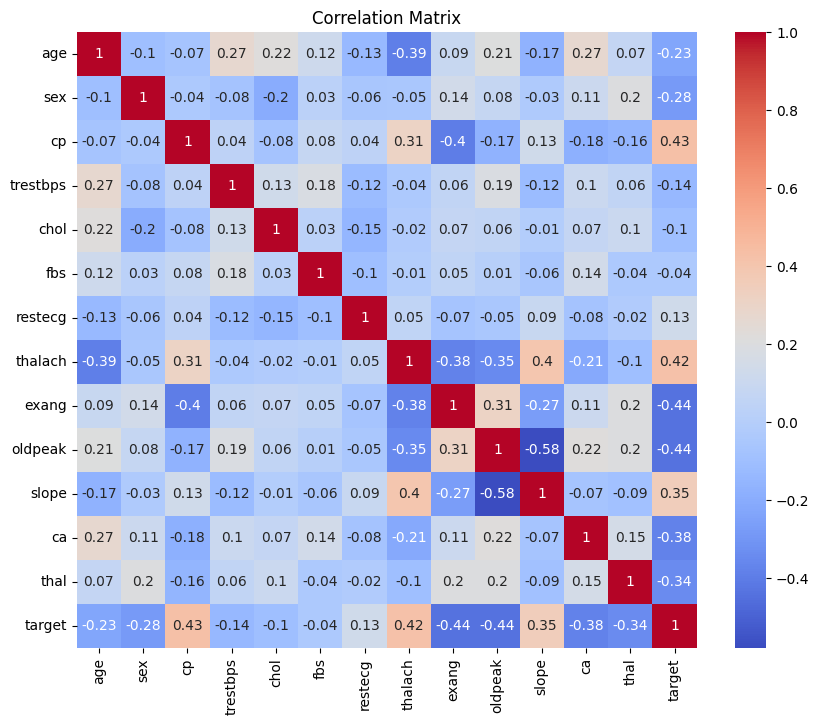

In [18]:
df_corr = df[cont_cols].corr().T
plt.figure(figsize=(10,8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

- Nilai korelasi semakin mendekati 1 maka semakin tinggi tingkat korelasinya
- Nilai korelasi semakin mendekati -1 maka semakin rendah tingkat korelasinya
- Faktor yang memiliki korelasi tinggi adalah 'cp', 'thalach', dan 'slope'
- Faktor yang memiliki korelasi rendah adalah 'restecg', dan 'fbs'

>>>3.2.2. Distribusi fitur kontinyu terhadap variabel target

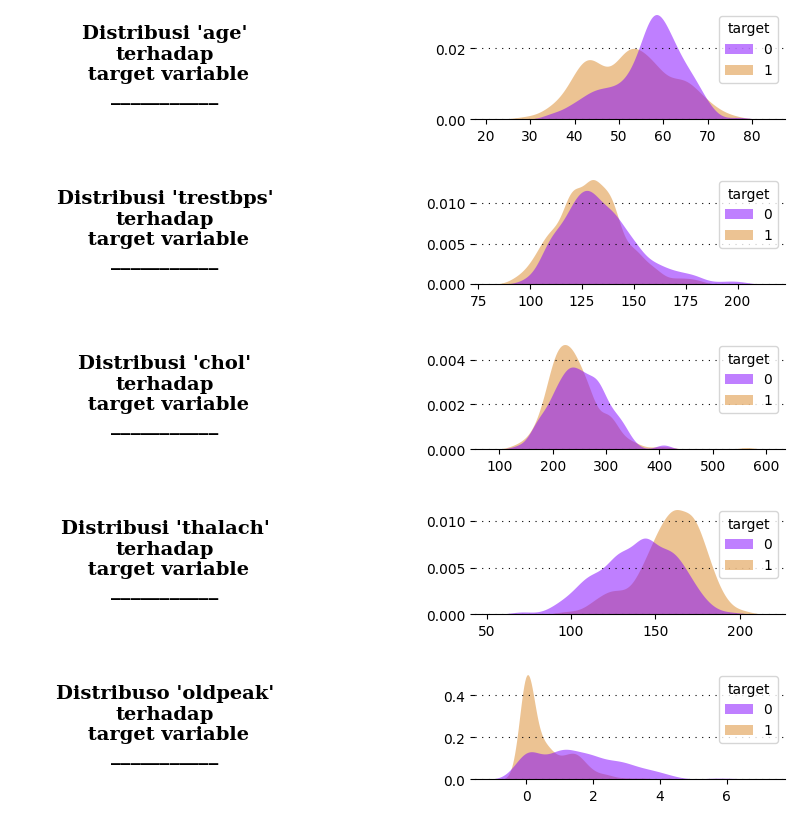

In [42]:
fig = plt.figure(figsize=(10,10))
g = fig.add_gridspec(5,2)
g.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(g[0,0])
ax1 = fig.add_subplot(g[0,1])
ax2 = fig.add_subplot(g[1,0])
ax3 = fig.add_subplot(g[1,1])
ax4 = fig.add_subplot(g[2,0])
ax5 = fig.add_subplot(g[2,1])
ax6 = fig.add_subplot(g[3,0])
ax7 = fig.add_subplot(g[3,1])
ax8 = fig.add_subplot(g[4,0])
ax9 = fig.add_subplot(g[4,1])

# Age title
ax0.text(0.5,0.5,"Distribusi 'age'\nterhadap\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trestbps title
ax2.text(0.5,0.5,"Distribusi 'trestbps'\nterhadap\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trestbps',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribusi 'chol'\nterhadap\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalach title
ax6.text(0.5,0.5,"Distribusi 'thalach'\nterhadap\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalach
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalach',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribuso 'oldpeak'\nterhadap\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 14,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

>>>3.2.3. Distribusi fitur kategorikal terhadap variabel target

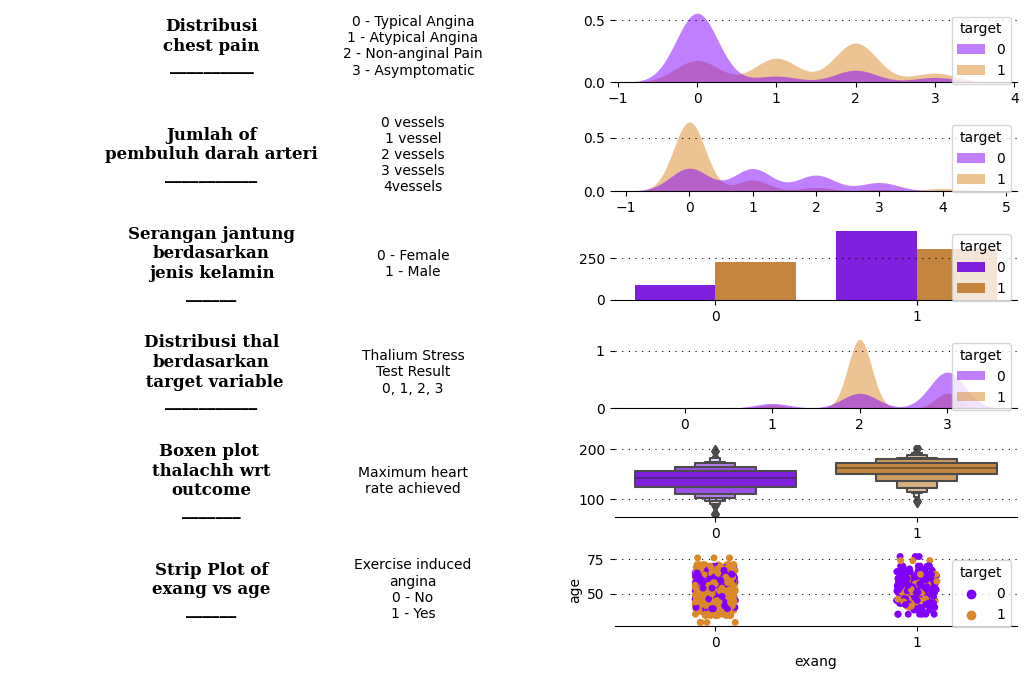

In [41]:
fig = plt.figure(figsize=(13,8))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Cp
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Distribusi\nchest pain\n__________",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 12, fontweight='bold', fontfamily='serif', color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10 )
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Ca
ax2.text(0.5,0.5,"Jumlah of\npembuluh darah arteri\n___________",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 12, fontweight='bold', fontfamily='serif', color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10)
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='ca',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex
ax4.text(0.5,0.5,"Serangan jantung\nberdasarkan\njenis kelamin\n______",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 12, fontweight='bold', fontfamily='serif', color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10)
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='target')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall
ax6.text(0.5,0.5,"Distribusi thal\nberdasarkan\n target variable\n___________",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 12, fontweight='bold', fontfamily='serif', color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10)
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thal',hue="target", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalach
ax8.text(0.5,0.5,"Boxen plot \nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 12, fontweight='bold', fontfamily='serif', color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10)
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='target',y='thalach',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

# Exang
ax10.text(0.5,0.5,"Strip Plot of\nexang vs age\n______",
        horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 12, fontweight='bold', fontfamily='serif', color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center', verticalalignment = 'center', fontsize = 10)
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exang',y='age',hue='target',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

>>>3.2.4. Pairplot berdasarkan variabel target

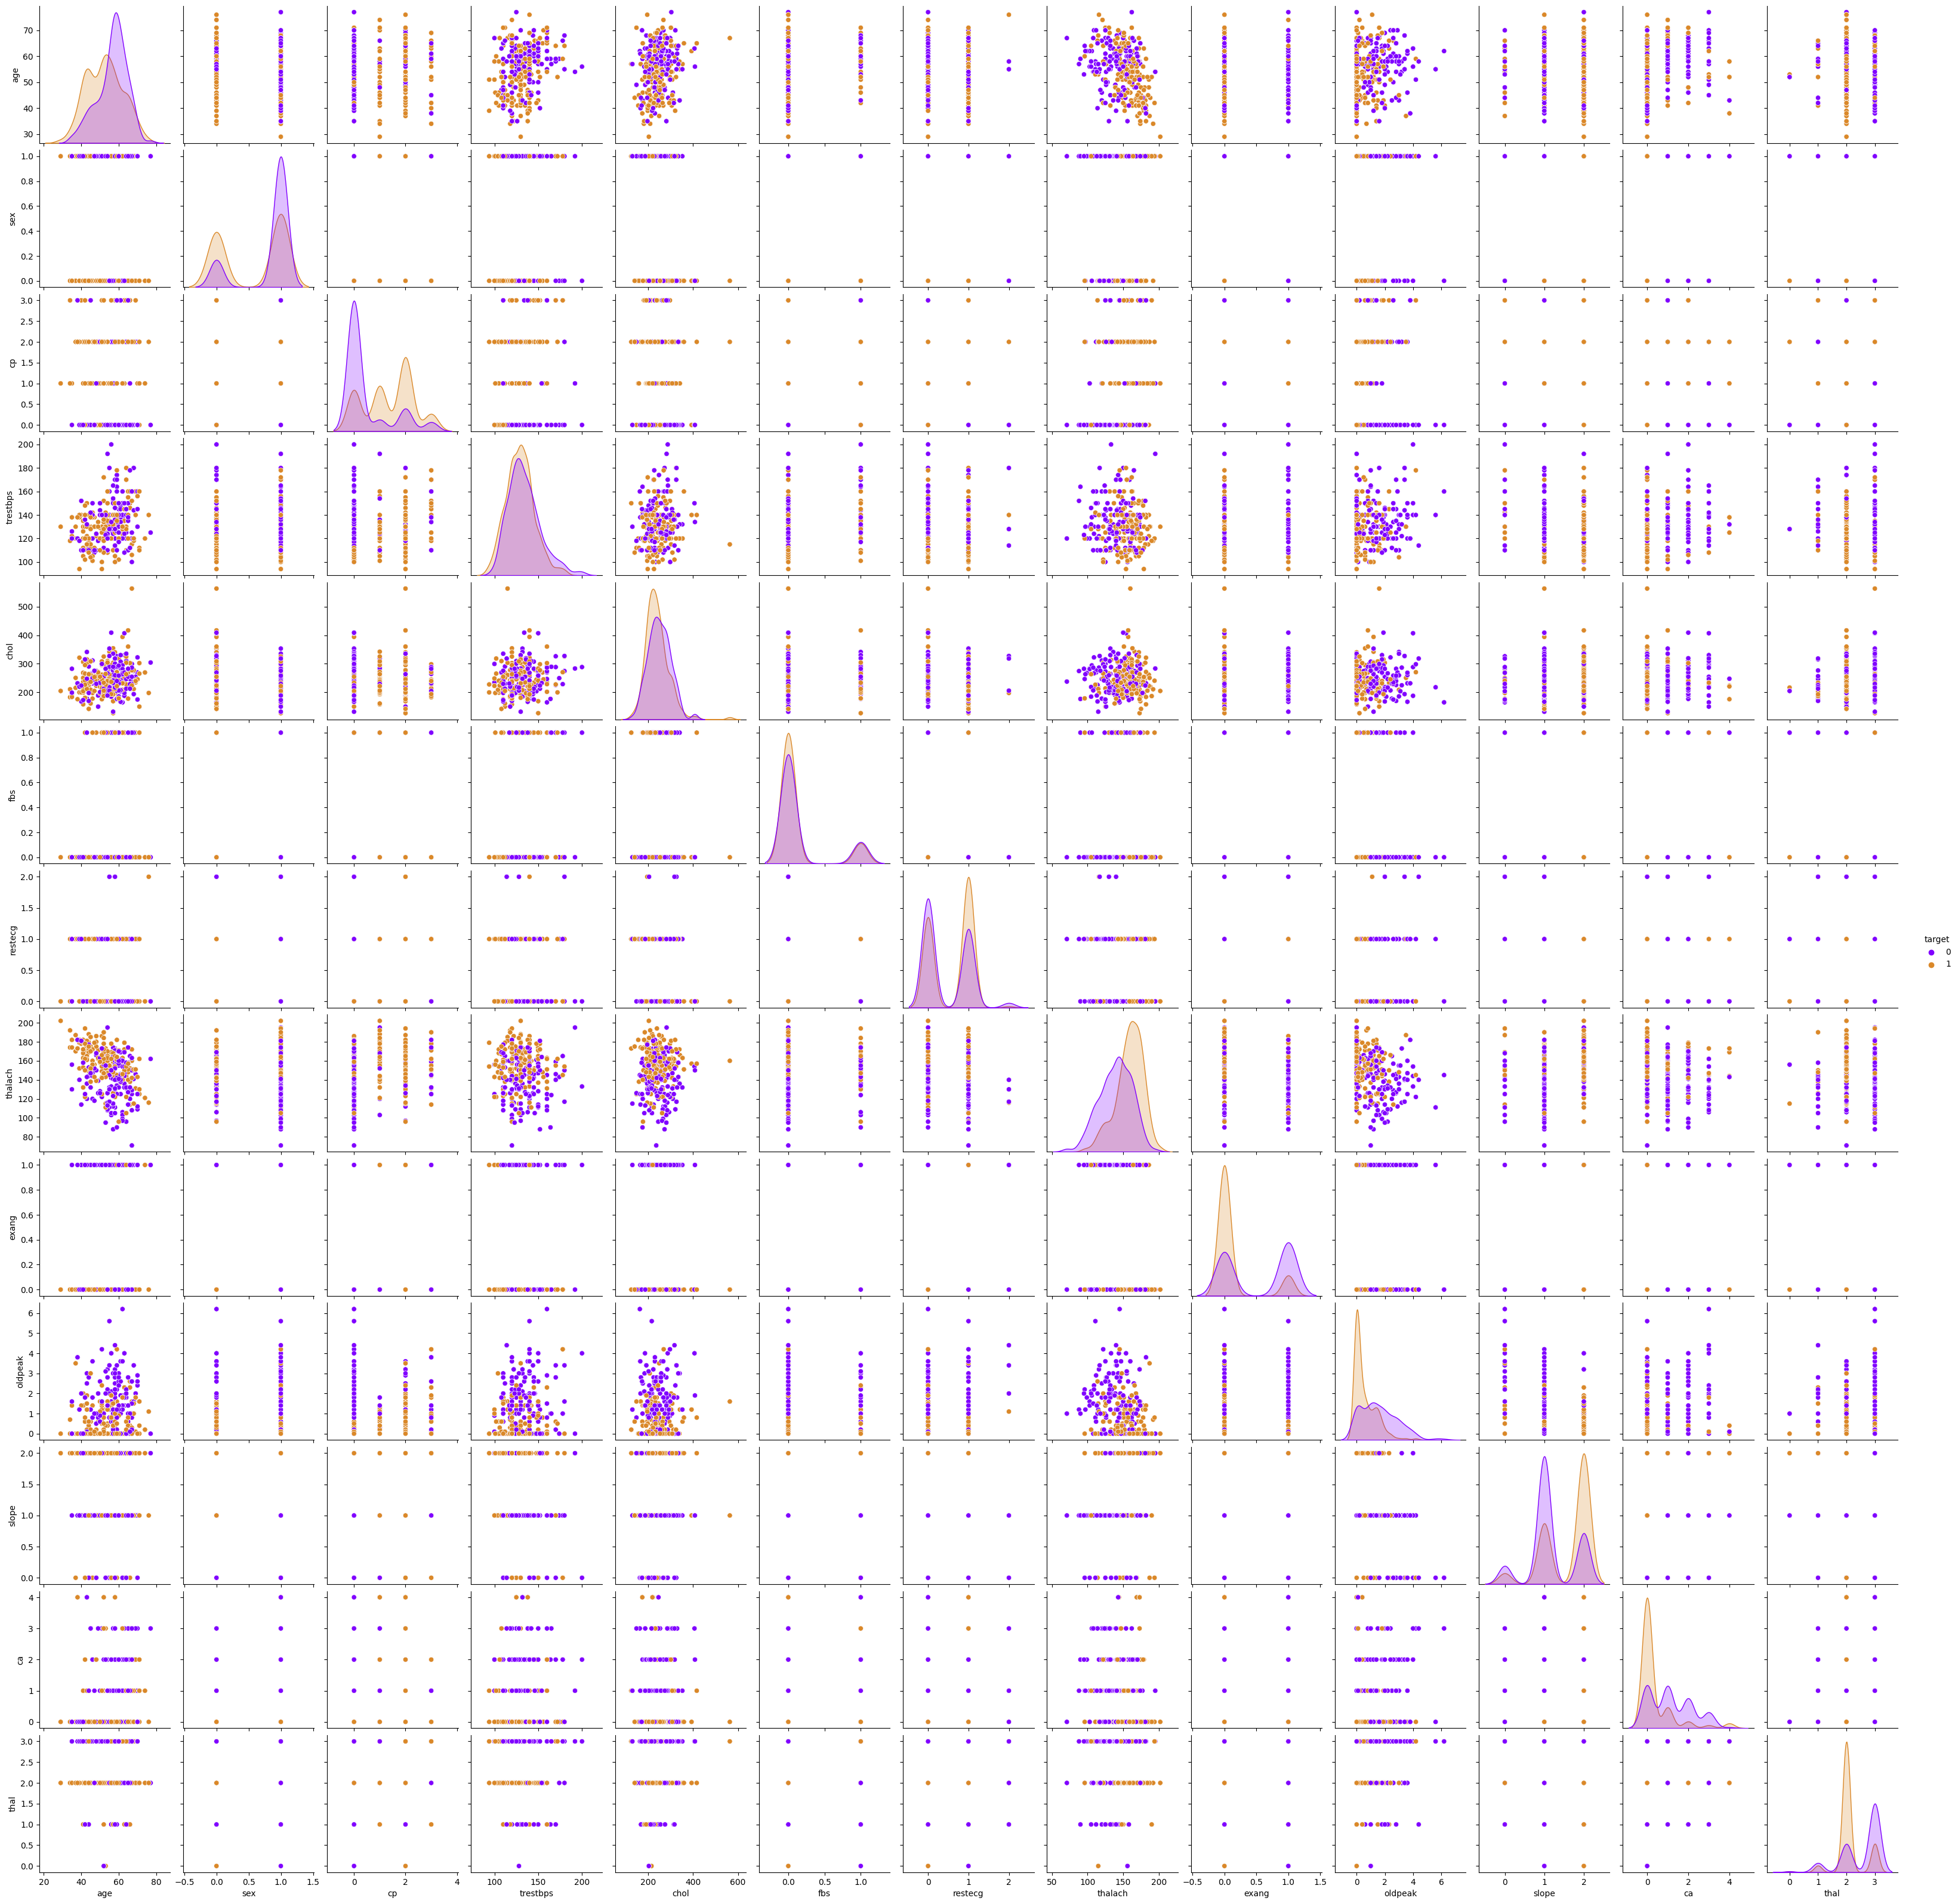

In [21]:
sns.pairplot(df,hue='target',palette = ["#8000ff","#da8829"])
plt.show()

4. Data Preprocessing
> 4.1. Drop fitur dengan korelasi rendah

In [22]:
df.drop(['restecg', 'fbs'], axis=1, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
4,62,0,0,138,294,106,0,1.9,1,3,2,0


In [23]:
df.shape

(1025, 12)

>4.2. Train and test split

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [25]:
cat_cols = ['sex','cp','ca','thal','exang','slope']
dfc = pd.get_dummies(df, columns=cat_cols)
dfc.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,125,212,168,1.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
2,70,145,174,125,2.6,0,0,1,1,0,...,0,0,0,0,1,0,1,1,0,0
3,61,148,203,161,0.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0


In [26]:
x = dfc.drop('target', axis=1)
y = dfc['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [27]:
print(f'Total sampel seluruh dataset: {len(x)}')
print(f'Total sampel pada train dataset: {len(x_train)}')
print(f'Total sampel pada test dataset: {len(x_test)}')

Total sampel seluruh dataset: 1025
Total sampel pada train dataset: 820
Total sampel pada test dataset: 205


In [28]:
print(f'Total sampel seluruh dataset: {len(y)}')
print(f'Total sampel pada train dataset: {len(y_train)}')
print(f'Total sampel pada test dataset: {len(y_test)}')

Total sampel seluruh dataset: 1025
Total sampel pada train dataset: 820
Total sampel pada test dataset: 205


>4.3. Standarisasi dengan menggunakan StandardScaler()

In [29]:
cont_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sc = StandardScaler()
sc.fit(x_train[cont_cols])
x_train[cont_cols] = sc.transform(x_train.loc[:, cont_cols])
x_test[cont_cols] = sc.transform(x_test.loc[:, cont_cols])
x_train[cont_cols].head()

,age,trestbps,chol,thalach,oldpeak
835,-0.585840,-0.779454,-1.935031,-1.019094,-0.210661
137,1.051477,2.741732,1.610634,0.202882,-0.912152
534,-0.040068,-1.347387,0.442176,0.770228,-0.912152
495,0.505705,0.186033,-0.222636,0.508376,-0.473720
244,-0.367531,-0.381900,-0.001032,0.726586,1.192321


In [30]:
x_train[cont_cols].describe().round(4)

,age,trestbps,chol,thalach,oldpeak
count,820.0000,820.0000,820.0000,820.0000,820.0000
mean,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0006,1.0006,1.0006,1.0006,1.0006
min,-2.7689,-2.1425,-2.3984,-3.4194,-0.9122
25%,-0.8041,-0.6659,-0.6860,-0.7572,-0.9122
50%,0.1782,-0.0979,-0.1018,0.1156,-0.2107
75%,0.7240,0.4700,0.5832,0.7375,0.5347
max,2.4705,3.8776,6.4255,2.2977,4.5244


5. Modelling
>5.1. Random Forest

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(x_train, y_train)
rf_predicted = rf.predict(x_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print(classification_report(y_test, rf_predicted))
print("Accuracy of Random Forest: {:.2f}%\n".format(round(rf_acc_score*100, 2)))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       102
           1       0.81      0.97      0.88       103

    accuracy                           0.87       205
   macro avg       0.89      0.87      0.87       205
weighted avg       0.89      0.87      0.87       205

Accuracy of Random Forest: 87.32%



>5.2. Decision Tree

In [32]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=7)
dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print(classification_report(y_test, dt_predicted))
print("Accuracy of Decision Tree Classifier: {:.2f}%\n".format(round(dt_acc_score*100, 2)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       102
           1       0.95      0.88      0.91       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205

Accuracy of Decision Tree Classifier: 91.71%



>5.3. Support Vector Machine (SVM)

In [33]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_predicted)

print(classification_report(y_test,svc_predicted))
print("Accuracy of Support Vector Classifier: {:.2f}%\n".format(round(svc_acc_score*100, 2)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       102
           1       0.84      0.91      0.87       103

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Accuracy of Support Vector Classifier: 86.83%



Extreme Gradient Boosting (XGBoost)

In [34]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=15)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

print(classification_report(y_test, xgb_predicted))
print("Accuracy of Extreme Gradient Boost: {:.2f}%\n".format(round(xgb_acc_score*100, 2)))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       102
           1       0.91      0.94      0.92       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205

Accuracy of Extreme Gradient Boost: 92.20%



6. Evaluasi Model

In [35]:
eval_mod = pd.DataFrame({'Model': ['Random Forest', 'Decision Tree', 'SVM', 'XGBoost'],
                         'Akurasi': [rf_acc_score*100, dt_acc_score*100, svc_acc_score*100, xgb_acc_score*100]})
eval_mod

,Model,Akurasi
0,Random Forest,87.317073
1,Decision Tree,91.707317
2,SVM,86.829268
3,XGBoost,92.195122


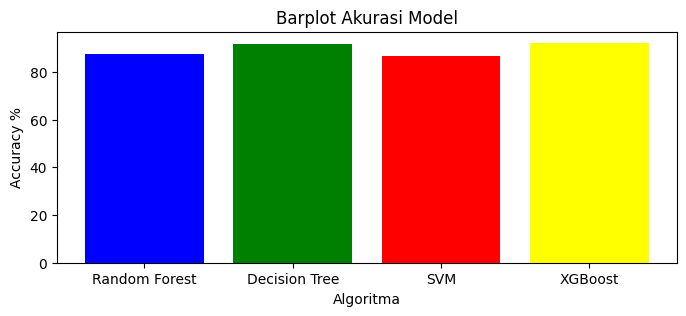

In [36]:
colors = ['blue', 'green', 'red', 'yellow']
plt.figure(figsize=(8,3))
plt.title("Barplot Akurasi Model")
plt.xlabel("Algoritma")
plt.ylabel("Accuracy %")
plt.bar(eval_mod['Model'],eval_mod['Akurasi'],color = colors)
plt.show()

In [37]:
rf_precision = precision_score(y_test,rf_predicted)
rf_recall = recall_score(y_test,rf_predicted)
rf_f1 = f1_score(y_test,rf_predicted)

dt_precision = precision_score(y_test,dt_predicted)
dt_recall = recall_score(y_test,dt_predicted)
dt_f1 = f1_score(y_test,dt_predicted)

svc_precision = precision_score(y_test,svc_predicted)
svc_recall = recall_score(y_test,svc_predicted)
svc_f1 = f1_score(y_test,svc_predicted)

xgb_precision = precision_score(y_test,xgb_predicted)
xgb_recall = recall_score(y_test,xgb_predicted)
xgb_f1 = f1_score(y_test,xgb_predicted)

eval_mod['Precision'] = [rf_precision, dt_precision, svc_precision, xgb_precision]
eval_mod['Recall'] = [rf_recall, dt_recall, svc_recall, xgb_recall]
eval_mod['F1-score'] = [rf_f1, dt_f1, svc_f1, xgb_f1]
print(eval_mod)

           Model    Akurasi  Precision    Recall  F1-score
0  Random Forest  87.317073   0.813008  0.970874  0.884956
1  Decision Tree  91.707317   0.947917  0.883495  0.914573
2            SVM  86.829268   0.839286  0.912621  0.874419
3        XGBoost  92.195122   0.906542  0.941748  0.923810


In [38]:
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)

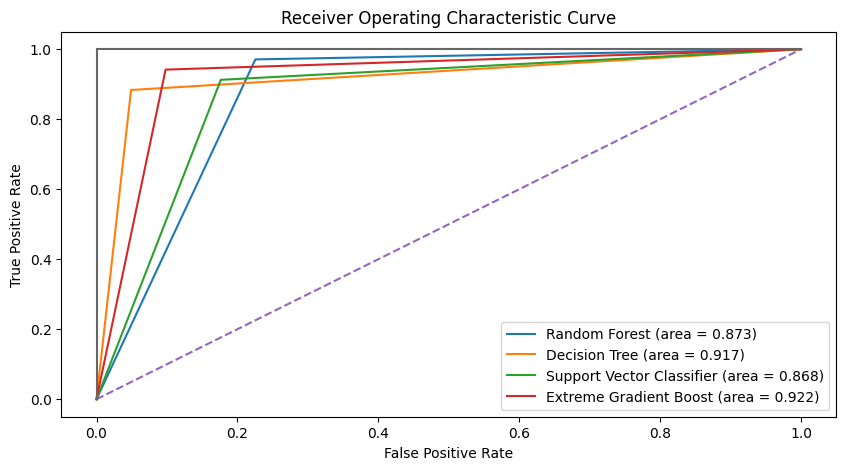

In [39]:
rf_roc_auc = roc_auc_score(y_test, rf_predicted)
dt_roc_auc = roc_auc_score(y_test, dt_predicted)
svc_roc_auc = roc_auc_score(y_test, svc_predicted)
xgb_roc_auc = roc_auc_score(y_test, xgb_predicted)

plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,
         label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot(dt_false_positive_rate,dt_true_positive_rate,
         label='Decision Tree (area = %0.3f)' % dt_roc_auc)
plt.plot(svc_false_positive_rate,svc_true_positive_rate,
         label='Support Vector Classifier (area = %0.3f)' % svc_roc_auc)
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,
         label='Extreme Gradient Boost (area = %0.3f)' % xgb_roc_auc)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.4')
plt.plot([1,1],c='.4')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

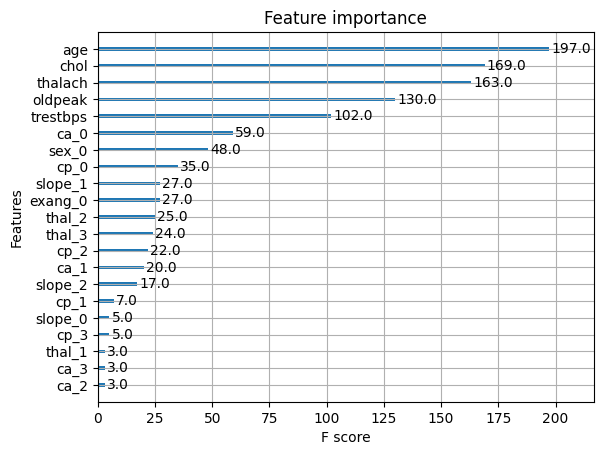

In [40]:
#mencari fitur yang paling berpengaruh
reg = XGBClassifier().fit(x, y)

# plot the feature importance
plot_importance(reg)
plt.show()